In [2]:
# import necessary libraries
import os, sys, glob
import math
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import torch
from tqdm.auto import tqdm
from PIL import Image
from importlib import reload # when you make changes to a .py, force reload imports
from DGXutils import GetFileNames, GetLowestGPU

# custom imports
sys.path.append('../')

from utils.GetLR import get_lr

In [4]:
# options

# epochs
num_epochs = 10
batches_per_epoch = 437
num_iters = num_epochs * batches_per_epoch

# other options
batches_per_eval = 437
warmup_iters = batches_per_epoch
lr_decay_iters = num_iters
max_lr = 1e-3
min_lr = 1e-5
max_iters = num_iters
log_interval = 1
eval_interval = batches_per_epoch
early_stop = 50

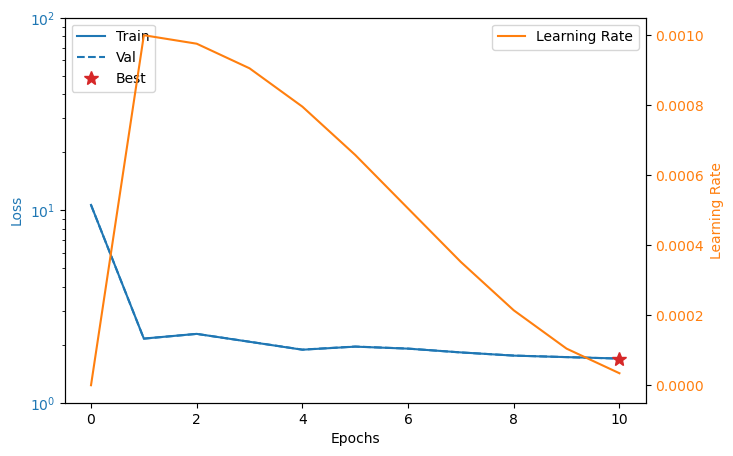

In [23]:
# parse logs
logs = []
with open('../logs/gxe_model/log.txt', 'r') as f:
    logs = f.readlines()
    logs = [l.strip() for l in logs][1:]
logs = [l.split(',') for l in logs]
logs = np.array(logs).astype(float)
epochs, train_loss, val_loss = logs.T
epochs = epochs.astype(int)

epochs = np.arange(0, epochs.max() + 1, 1)
lrs = [get_lr(epoch, 1, 10, max_lr, min_lr) for epoch in epochs]

# get best model
best_epoch = epochs[np.argmin(val_loss)]

# plot
fig, ax = plt.subplots(1, 1, figsize=(7.5, 5))

# losses
ax.semilogy(epochs, train_loss, '-', color='tab:blue', label='Train')
ax.semilogy(epochs, val_loss, '--', color='tab:blue', label='Val')
ax.semilogy(best_epoch, min(val_loss), '*', color='tab:red', label='Best', markersize=10)
ax.set_ylabel('Loss', color='tab:blue')
ax.set_xlabel('Epochs')
ymin, ymax = ax.get_ylim()
ymin = 10 ** int(np.log10(ymin) - 1)
ymax = 10 ** int(np.log10(ymax) + 1)
ax.set_ylim(ymin, ymax)
ax.tick_params(axis='y', labelcolor='tab:blue')
ax.legend(loc='upper left')

# learning rate
ax2 = ax.twinx()
ax2.plot(epochs, lrs, '-', color='tab:orange', label='Learning Rate')
ax2.tick_params(axis='y', labelcolor='tab:orange')
ax2.set_ylabel('Learning Rate', color='tab:orange')
ax2.legend(loc='upper right')

plt.show()